In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from neural_network.network import NeuralNetwork
from neural_network.gradient_descent import stochastic_gradient_descent, batch_gradient_descent
from main import predict


In [2]:
df = pd.read_csv('./data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [5]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [6]:
X = np.array(df.drop('diagnosis',axis=1))

y = np.array(df.diagnosis)

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y[:5])

[1 1 1 1 1]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=30)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
y_val = y_val.reshape(len(y_val), 1)


In [100]:
epochs = 250
batch_size = 100
learning_rate = 0.001
layers =  [(8, "tanh"), (10, "tanh"), (1, "sigmoid")]

In [101]:
model = NeuralNetwork(X_train.shape[1],
                      layers,
                      learning_rate
                    )
model.create_network()
print(model.architecture)
start_time = time.time()
result = batch_gradient_descent(epochs, model, X_train, y_train, X_val, y_val)
end_time = time.time()
print(f"time elapsed : {end_time - start_time}")
print(f"Model accuracy score...:{result['accuracy']}")
bgd_losses = result['losses']

[{'input_dim': 30, 'output_dim': 8, 'activation': 'tanh'}, {'input_dim': 8, 'output_dim': 10, 'activation': 'tanh'}, {'input_dim': 10, 'output_dim': 1, 'activation': 'sigmoid'}]
Progress: 0.0% ... Training loss: 1.7892797710363078 ... Validation loss: 1.7434951789301616
Progress: 0.4% ... Training loss: 1.740793735017181 ... Validation loss: 1.6964263142800329
Progress: 0.8% ... Training loss: 1.6944217664729577 ... Validation loss: 1.6512889157453228
Progress: 1.2% ... Training loss: 1.650217063214584 ... Validation loss: 1.6079701352629152
Progress: 1.6% ... Training loss: 1.60820337004983 ... Validation loss: 1.5664744468261018
Progress: 2.0% ... Training loss: 1.568407663115765 ... Validation loss: 1.5269087199395777
Progress: 2.4% ... Training loss: 1.5309053449655239 ... Validation loss: 1.4894018594352902
Progress: 2.8% ... Training loss: 1.4957828626691676 ... Validation loss: 1.4539851205931886
Progress: 3.2% ... Training loss: 1.4630288791600985 ... Validation loss: 1.4205554

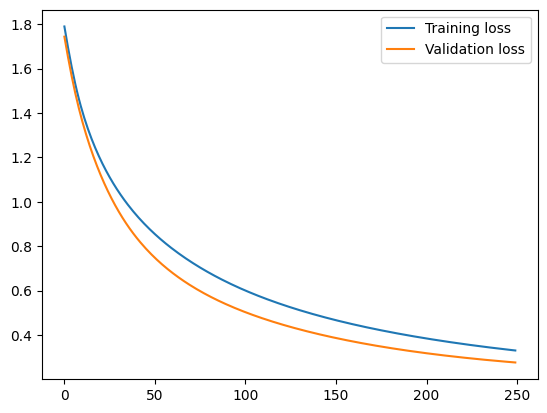

In [102]:
plt.plot(bgd_losses['train'], label='Training loss')
plt.plot(bgd_losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [103]:
bgd_model_prediction_accuracy = predict(model, X_test, y_test)
print(f"Model prediction accuracy score...:{bgd_model_prediction_accuracy}")

Model prediction accuracy score...:0.8771929824561403


In [14]:
model = NeuralNetwork(X_train.shape[1],
                      layers,
                      learning_rate
                    )
model.create_network()
print(model.architecture)
result = stochastic_gradient_descent(epochs, model, X_train, y_train, X_val, y_val, batch_size)
print(f"Model accuracy score...:{result['accuracy']}")
sgd_losses = result['losses']

[{'input_dim': 30, 'output_dim': 5, 'activation': 'ReLU'}, {'input_dim': 5, 'output_dim': 5, 'activation': 'ReLU'}, {'input_dim': 5, 'output_dim': 1, 'activation': 'sigmoid'}]
Progress: 0.0% ... Training loss: 0.7446618720179877 ... Validation loss: 0.8112220494418929
Progress: 0.4% ... Training loss: 0.7566689001970646 ... Validation loss: 0.8958578156113086
Progress: 0.8% ... Training loss: 0.7752764403333475 ... Validation loss: 0.9795318055769512
Progress: 1.2% ... Training loss: 0.8746078846374862 ... Validation loss: 1.0866845850223428
Progress: 1.6% ... Training loss: 0.9017834101439611 ... Validation loss: 1.2014232389486912
Progress: 2.0% ... Training loss: 1.260733529186249 ... Validation loss: 3.056093367994164
Progress: 2.4% ... Training loss: 2.5648728649197055 ... Validation loss: nan
Progress: 2.8% ... Training loss: nan ... Validation loss: nan
Progress: 3.2% ... Training loss: nan ... Validation loss: nan
Progress: 3.6% ... Training loss: nan ... Validation loss: nan
P

/Users/tinuade/PycharmProjects/ANN/neural_network/layers.py:58: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/tinuade/PycharmProjects/ANN/neural_network/loss_function.py:15: RuntimeWarning: divide by zero encountered in log
  log_loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/Users/tinuade/PycharmProjects/ANN/neural_network/loss_function.py:15: RuntimeWarning: invalid value encountered in multiply
  log_loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/Users/tinuade/PycharmProjects/ANN/neural_network/loss_function.py:20: RuntimeWarning: divide by zero encountered in true_divide
  return - (y / y_pred + (1 - y) * 1 / (1 - y_pred))
/Users/tinuade/PycharmProjects/ANN/neural_network/loss_function.py:20: RuntimeWarning: invalid value encountered in true_divide
  return - (y / y_pred + (1 - y) * 1 / (1 - y_pred))
/Users/tinuade/PycharmProjects/ANN/neural_network/network.py:149: RuntimeWarning: invalid value encountered in multiply

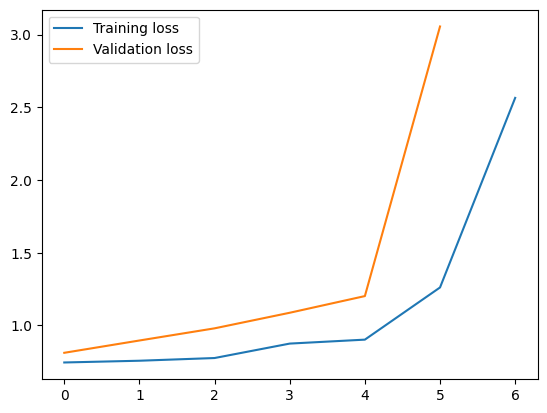

In [15]:
plt.plot(sgd_losses['train'], label='Training loss')
plt.plot(sgd_losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [16]:
sgd_model_prediction_accuracy = predict(model, X_test, y_test)
print(f"Model prediction accuracy score...:{sgd_model_prediction_accuracy}")

Model prediction accuracy score...:0.6491228070175439
